# Is there a salary difference between player weight?

## Import the required packages, data, and clean the data

In [6]:
exec(open("../Scripts/Packages.py").read())
exec(open("../Scripts/Data_Import.py").read())
exec(open("../Scripts/Data_Cleaning.py").read())

Data organization for this research question

In [7]:
Analysis = Salary_Analysis.loc[:, ['weight', 'salary']]
Analysis['salary'] = Analysis['salary']/1000000
Pivot = Analysis.pivot(columns='weight', values='salary')

## Graph the data to manually examine the differences in the group

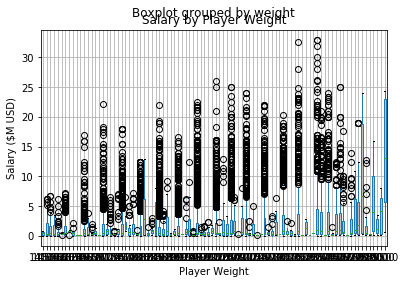

In [8]:
Analysis.boxplot(by = 'weight')
plt.title('Salary by Player Weight')
plt.xlabel('Player Weight')
plt.ylabel('Salary ($M USD)')
plt.show()

## Use statistical testing to confirm the variance

NB: This probably should be using a friedman test as the variables are not really independent

Set the significance value before any testing. 

In [9]:
alpha_value = 0.001
independent = True

Combined Statistical Testing Workflow

In [10]:
exec(open("../Scripts/Data_Testing/Statistical_Tests.py").read())

Comparing Standard Deviations

T-statistic: nan
P-Value: nan
  
Error


Checking for Normality

P-value: 2.60606364293e-12
  
Reject NULL hypothesis - Not normal distribution


ANOVA Testing

Can one use ANOVA?
  
Independent:  True
Normal:  False
StdDevEq:  False
  
The assumptions to use ANOVA have not been met.

Kruskal-Wallis Testing

H-statistic: 1099.42520393
P-Value: 9.67109288795e-173

Reject NULL hypothesis - Significant differences exist between groups.


If variable is statistically significant, append to analysis for further investigation

In [11]:
if Sig == True: 
    columns = list(Analysis)
    Capstone_csv = pd.read_csv("../Data/Capstone.csv")
    Capstone_csv[columns] = Salary_Analysis[columns]
    Capstone_csv.to_csv("../Data/Capstone.csv", index = False)